<a href="https://colab.research.google.com/github/vk18mishra/Movielens-Misc-Project/blob/main/Super_Bonus_Vivek_Mishra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Super Bonus Task - Analysis on MoviLens Dataset

### Analysis Part 1 - also used for our application

In [ ]:
#importing all the neccesary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

import warnings
warnings.filterwarnings('ignore')
     

In [ ]:
#getting the movie lens dataset
!wget --no-check-certificate https://files.grouplens.org/datasets/movielens/ml-25m.zip

--2023-02-08 12:06:53--  https://files.grouplens.org/datasets/movielens/ml-25m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261978986 (250M) [application/zip]
Saving to: ‘ml-25m.zip’

ml-25m.zip          100%[===================>] 249.84M  71.7MB/s    in 3.7s    

2023-02-08 12:06:57 (67.5 MB/s) - ‘ml-25m.zip’ saved [261978986/261978986]



In [ ]:
#unzipping the data to read the csv's
ml_25 = '/content/ml-25m.zip'
ml_25z = zipfile.ZipFile(ml_25, 'r')
ml_25z.extractall('/')
ml_25z.close()

In [ ]:
#ratings
ratings_df = pd.read_csv('/ml-25m/ratings.csv')

#tags from user
tags_df = pd.read_csv('/ml-25m/tags.csv')

#movie titles and Genres
movies_df = pd.read_csv('/ml-25m/movies.csv')

In [ ]:
movies_df_cp = movies_df.copy()

**Dividing Ratings Dataframe into 10 equal parts in ascending order of movieId (For Partioning of Ratings Table in our Database Application)**

In [ ]:
ratings_df = ratings_df.sort_values(by=['movieId'])

In [ ]:
ratings_df.head()

userId  movieId  rating   timestamp
2001185    13334        1     5.0   832023973
10627899   69000        1     4.0  1564248795
4075778    26803        1     3.5  1106468113
19245863  124893        1     3.5  1173048946
21816622  141835        1     3.5  1558539488

In [ ]:
splitted_ratings = np.array_split(ratings_df, 10)

In [ ]:
for i in range(10):
  print(splitted_ratings[i].shape)
  min_movieId = min(splitted_ratings[i].movieId)
  max_movieId = max(splitted_ratings[i].movieId)
  print(min_movieId, max_movieId)

(2500010, 4)
1 356
(2500010, 4)
356 898
(2500010, 4)
898 1295
(2500010, 4)
1295 2081
(2500010, 4)
2081 2947
(2500009, 4)
2947 4148
(2500009, 4)
4148 6478
(2500009, 4)
6478 44191
(2500009, 4)
44191 81847
(2500009, 4)
81847 209171


In [ ]:
del ratings_df['timestamp']  
del tags_df['timestamp']

**Dividing Movies Dataframe into 10 equal parts in ascending order of movieId (For Partioning of Movies, Links and avg_rating_count Tables in our Database Application)**

In [ ]:
movies_df = movies_df.sort_values(by=['movieId'])

In [ ]:
movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [ ]:
splitted_movies = np.array_split(movies_df, 10)

In [ ]:
for i in range(10):
  print(splitted_movies[i].shape)
  min_movieId = min(splitted_movies[i].movieId)
  max_movieId = max(splitted_movies[i].movieId)
  print(min_movieId, max_movieId)

(6243, 3)
1 6354
(6243, 3)
6355 60382
(6243, 3)
60384 97845
(6242, 3)
97853 122709
(6242, 3)
122711 138024
(6242, 3)
138026 152682
(6242, 3)
152686 166631
(6242, 3)
166633 179933
(6242, 3)
179935 193599
(6242, 3)
193603 209171


**Getting Genres Wordcloud - For our application**

In [ ]:
genre_uni = []
genres_df = movies_df['genres'].str.split('|',expand=True)
for (columnName, columnData) in genres_df.iteritems():
  genre_uni.append(list(columnData.values))
genre_uni = [item for sublist in genre_uni for item in sublist]
genre_uni = list(set(genre_uni))

In [ ]:
genre_uni.remove('(no genres listed)')
genre_uni.remove(None)
genre_uni

['IMAX',
 'Drama',
 'Documentary',
 'Action',
 'Crime',
 'Thriller',
 'Mystery',
 'Comedy',
 'Western',
 'Film-Noir',
 'Adventure',
 'Fantasy',
 'Musical',
 'Children',
 'War',
 'Sci-Fi',
 'Horror',
 'Animation',
 'Romance']

In [ ]:
genre_cnt_df = pd.DataFrame(columns = ['genre', 'count'])
for genre in genre_uni:
  count = movies_df[(movies_df['genres'].str.contains(genre, na=False))].count()[1]
  genre_cnt_df.loc[len(genre_cnt_df.index)] = [genre, count]

In [ ]:
genre_cnt_df = genre_cnt_df.sort_values(by=['count'], ascending=False)
genre_cnt_df

genre  count
1         Drama  25606
7        Comedy  16870
5      Thriller   8654
18      Romance   7719
3        Action   7348
16       Horror   5989
2   Documentary   5605
4         Crime   5319
10    Adventure   4145
15       Sci-Fi   3595
13     Children   2935
17    Animation   2929
6       Mystery   2925
11      Fantasy   2731
14          War   1874
8       Western   1399
12      Musical   1054
9     Film-Noir    353
0          IMAX    195

In [ ]:
!pip install circlify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


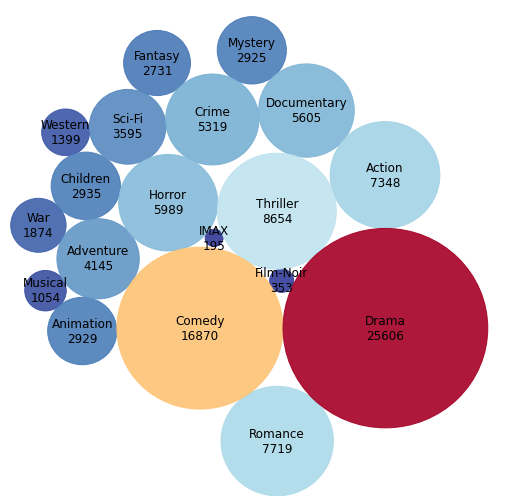

In [ ]:
import circlify
import seaborn as sns
def get_colordict(palette,number,start):
        pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
        color_d = dict(enumerate(pal, start=start))
        return color_d

# compute circle positions:
circles = circlify.circlify(genre_cnt_df['count'].tolist(), 
                                show_enclosure=False, 
                                target_enclosure=circlify.Circle(x=0, y=0)
                        )
n = genre_cnt_df['count'].max()
color_dict = get_colordict('RdYlBu_r',n ,1)

fig, ax = plt.subplots(figsize=(9,9), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = list(genre_cnt_df['genre'])
counts = list(genre_cnt_df['count'])
labels.reverse()
counts.reverse()

# print circles
for circle, label, count in zip(circles, labels, counts):
        x, y, r = circle
        ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color = color_dict.get(count)))
        plt.annotate(label +'\n'+ str(count), (x,y), size=12, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

### **Analysis Starting**

**Plot showing density(frequencies/number) of movies released over the years**

In [ ]:
movies_df_tmp = movies_df['title'].str.extract('(?P<Year>\s+\([0-9][0-9][0-9][0-9]\))',expand=True)
movies_df_tmp = movies_df_tmp['Year'].str.extract('(?P<Year1>\((.*?)\))',expand=True)

In [ ]:
movies_df['Release_Year'] = movies_df_tmp[1]

In [ ]:
movies_df.head(5)

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres Release_Year  
0  Adventure|Animation|Children|Comedy|Fantasy         1995  
1                   Adventure|Children|Fantasy         1995  
2                               Comedy|Romance         1995  
3                         Comedy|Drama|Romance         1995  
4                                       Comedy         1995

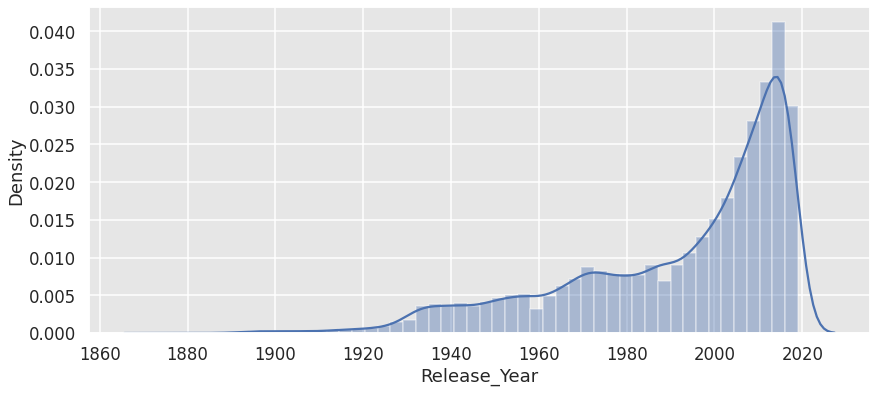

In [ ]:
sns.set(rc={'figure.figsize':(14, 6)})
sns.set_context("talk")
sns.set_style("darkgrid", {"axes.facecolor": ".9"}) #sns.axes_style("whitegrid")

sns.distplot(movies_df.Release_Year)

### Separating Genres - Bitmap way

In [ ]:
movies_df_copy = movies_df_cp.copy()

In [ ]:
movies_new_df = pd.DataFrame(columns=['movieId', 'title', 'Adventure',	'Animation',	'Children',	'Comedy',	'Fantasy',	'Romance',	'Drama',	'Action',	'Crime',	'Thriller',	'Horror',	'Mystery',	'Sci-Fi',	'IMAX',	'Documentary',	'War',	'Musical',	'Western',	'Film-Noir', '(no genres listed)'])

In [ ]:
def f(category_list):
    '''This is a helper function that splits and maps the categories.'''
    n_categories = len(category_list)
    return pd.Series(dict(zip(category_list, [1]*n_categories)))   

# table1 : movie and genre
t1 = movies_df_copy.genres.dropna().str.split('|').apply(f)
movies_df_copy = pd.concat([movies_df_copy, t1], axis = 1)
movies_df_copy = movies_df_copy.drop('genres',1)
movies_df_copy = movies_df_copy.sort_values(by='movieId')

In [ ]:
movies_df_copy = movies_df_copy.fillna(0)

In [ ]:
movies_df_copy.head(5)

movieId                               title  Adventure  Animation  \
0        1                    Toy Story (1995)        1.0        1.0   
1        2                      Jumanji (1995)        1.0        0.0   
2        3             Grumpier Old Men (1995)        0.0        0.0   
3        4            Waiting to Exhale (1995)        0.0        0.0   
4        5  Father of the Bride Part II (1995)        0.0        0.0   

   Children  Comedy  Fantasy  Romance  Drama  Action  ...  Horror  Mystery  \
0       1.0     1.0      1.0      0.0    0.0     0.0  ...     0.0      0.0   
1       1.0     0.0      1.0      0.0    0.0     0.0  ...     0.0      0.0   
2       0.0     1.0      0.0      1.0    0.0     0.0  ...     0.0      0.0   
3       0.0     1.0      0.0      1.0    1.0     0.0  ...     0.0      0.0   
4       0.0     1.0      0.0      0.0    0.0     0.0  ...     0.0      0.0   

   Sci-Fi  IMAX  Documentary  War  Musical  Western  Film-Noir  \
0     0.0   0.0          0.0  0.0      0.0      0.0        0.0   
1     0.0   0.0          0.0  0.0      0.0      0.0        0.0   
2     0.0   0.0          0.0  0.0      0.0      0.0        0.0   
3     0.0   0.0          0.0  0.0      0.0      0.0        0.0   
4     0.0   0.0          0.0  0.0      0.0      0.0        0.0   

   (no genres listed)  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 22 columns]

In [ ]:
movies_df_copy.to_csv('movies_new.csv', index=False)

**Let's see what people normally say about these movies**

In [ ]:
from wordcloud import WordCloud

**1. Comedy**

In [ ]:
cols = ['movieId','Comedy']
tmp_df = movies_df_copy[cols]
tmp_df = tmp_df.loc[tmp_df['Comedy'] == 1]
tags_df_comedy = tags_df.merge(tmp_df, on = 'movieId', how='inner')
tags_df_comedy.head(5)

userId  movieId             tag   timestamp  Comedy
0       4     1732     dark comedy  1573943598     1.0
1       4     1732  great dialogue  1573943604     1.0
2    1048     1732    imdb top 250  1172144456     1.0
3    1367     1732         bowling  1182527673     1.0
4    1367     1732         classic  1182527670     1.0

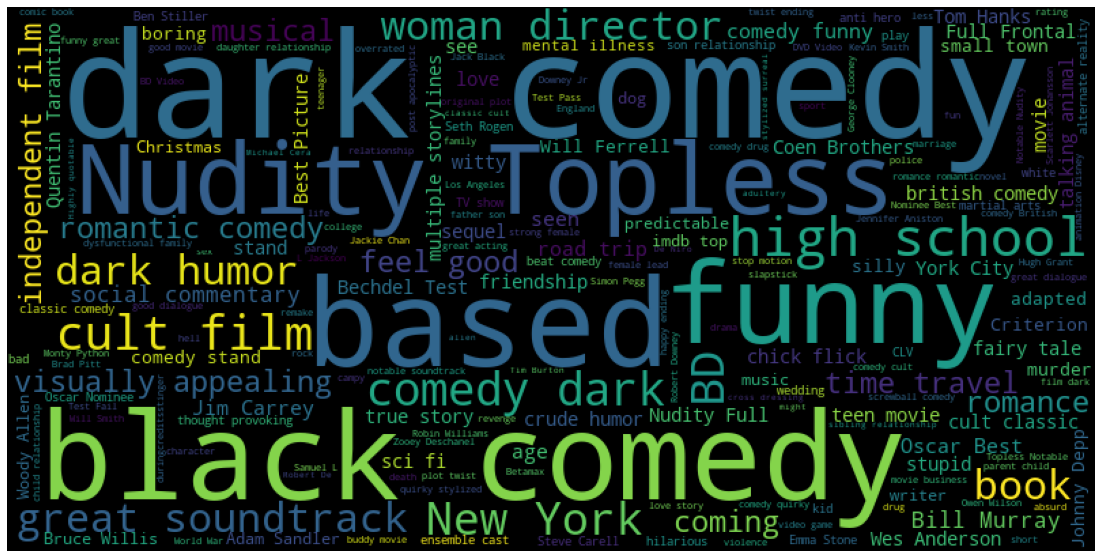

In [ ]:
text = tags_df_comedy['tag'].str.cat(sep=' ')

wordcloud = WordCloud(background_color ='black', width=800, height=400).generate(str(text))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
del tmp_df
del tags_df_comedy

**2. Romance**

In [ ]:
cols = ['movieId','Romance']
tmp_df = movies_df_copy[cols]
tmp_df = tmp_df.loc[tmp_df['Romance'] == 1]
tags_df_romance = tags_df.merge(tmp_df, on = 'movieId', how='inner')
tags_df_romance.head(5)

userId  movieId              tag   timestamp  Romance
0       4   164909           cliche  1573943721      1.0
1       4   164909          musical  1573943714      1.0
2    3420   164909           cliche  1552627178      1.0
3    3420   164909  Damien Chazelle  1552627151      1.0
4    3420   164909       Emma Stone  1552627148      1.0

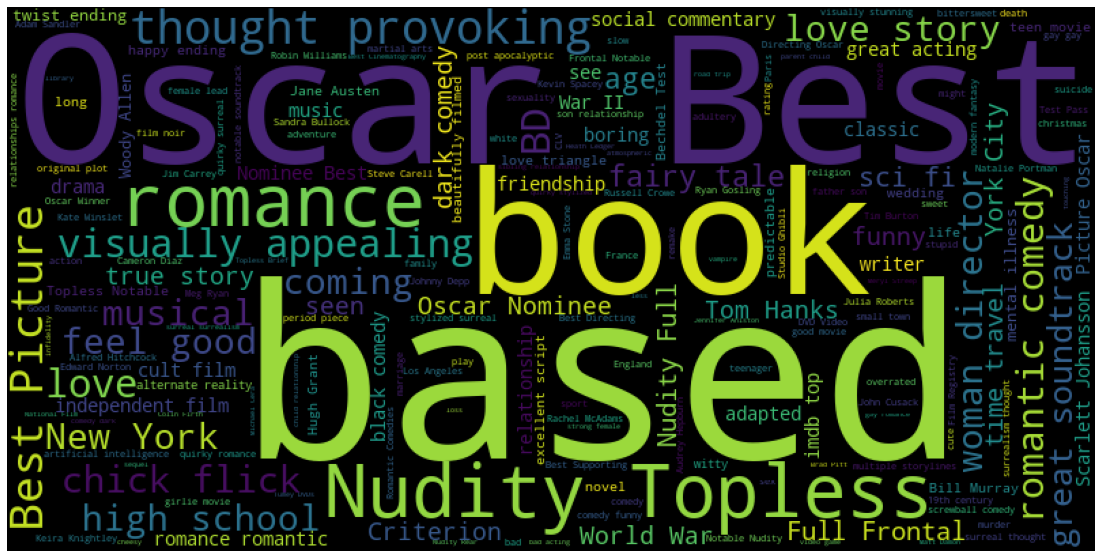

In [ ]:
text = tags_df_romance['tag'].str.cat(sep=' ')

wordcloud = WordCloud(background_color ='black', width=800, height=400).generate(str(text))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
del tmp_df
del tags_df_romance

**3. Drama**

In [ ]:
cols = ['movieId','Drama']
tmp_df = movies_df_copy[cols]
tmp_df = tmp_df.loc[tmp_df['Drama'] == 1]
tags_df_drama = tags_df.merge(tmp_df, on = 'movieId', how='inner')
tags_df_drama.head(5)

userId  movieId                   tag   timestamp  Drama
0       4    44665  unreliable narrators  1573943619    1.0
1    1881    44665          Bruce Willis  1304045834    1.0
2    1881    44665                hitman  1304045842    1.0
3    1881    44665        Morgan Freeman  1304045831    1.0
4    1881    44665       organized crime  1304045829    1.0

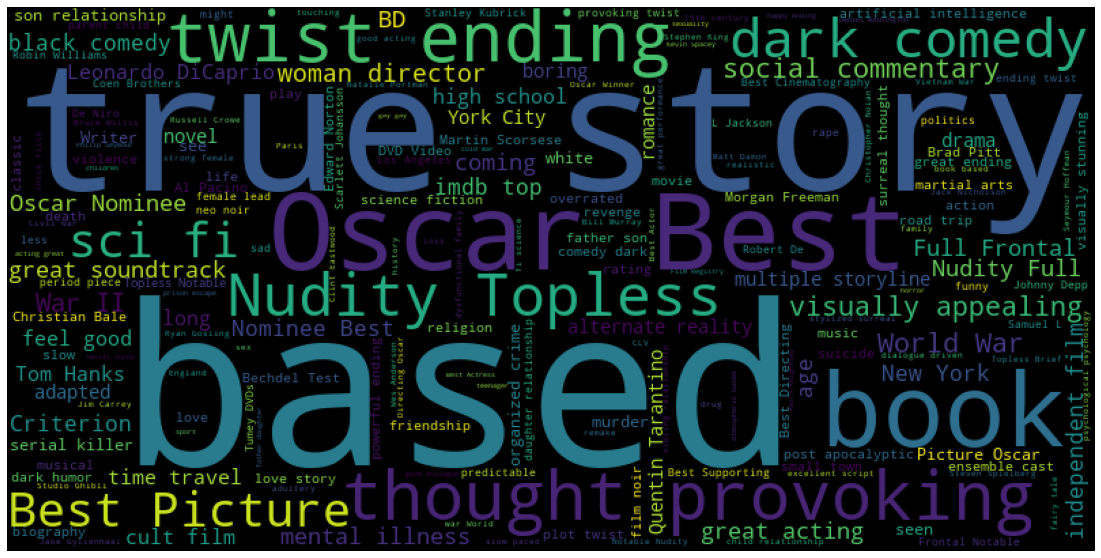

In [ ]:
text = tags_df_drama['tag'].str.cat(sep=' ')

wordcloud = WordCloud(background_color ='black', width=800, height=400).generate(str(text))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
del tmp_df
del tags_df_drama

**4. Horror**

In [ ]:
cols = ['movieId','Horror']
tmp_df = movies_df_copy[cols]
tmp_df = tmp_df.loc[tmp_df['Horror'] == 1]
tags_df_horror = tags_df.merge(tmp_df, on = 'movieId', how='inner')
tags_df_horror.head(5)

userId  movieId                     tag   timestamp  Horror
0       4   168250                  horror  1573945163     1.0
1       4   168250           unpredictable  1573945171     1.0
2    3394   168250        allison williams  1525238406     1.0
3    3394   168250              conspiracy  1525238364     1.0
4    3394   168250  Director: Jordan Peele  1525238390     1.0

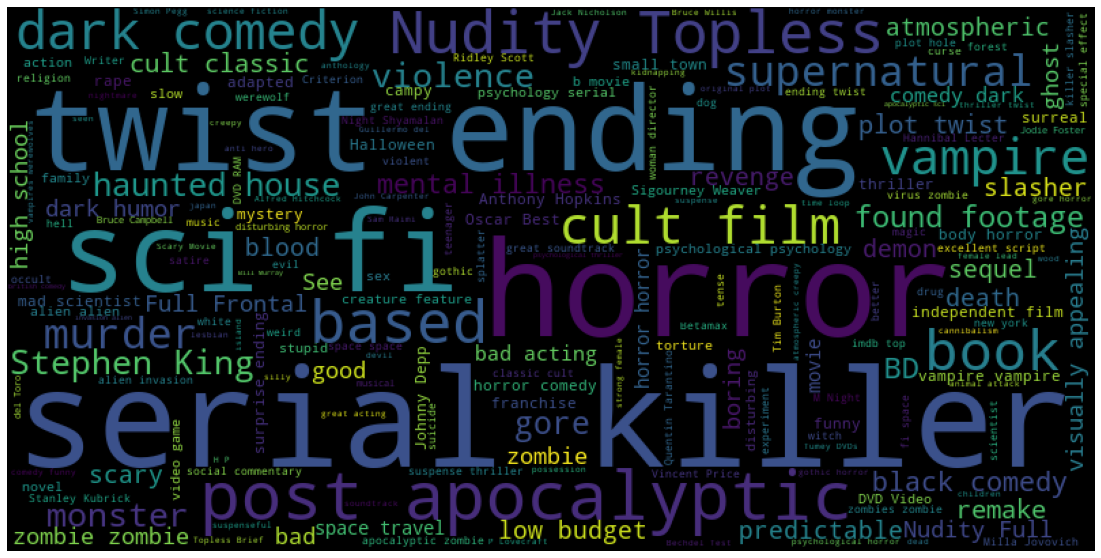

In [ ]:
text = tags_df_horror['tag'].str.cat(sep=' ')

wordcloud = WordCloud(background_color ='black', width=800, height=400).generate(str(text))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
del tmp_df
del tags_df_horror

**4. Documentary**

In [ ]:
cols = ['movieId','Documentary']
tmp_df = movies_df_copy[cols]
tmp_df = tmp_df.loc[tmp_df['Documentary'] == 1]
tags_df_Documentary = tags_df.merge(tmp_df, on = 'movieId', how='inner')
tags_df_Documentary.head(5)

userId  movieId               tag   timestamp  Documentary
0      84   194728               art  1549387440          1.0
1      84   194728  contemporary art  1549387437          1.0
2      84   194728       documentary  1549387432          1.0
3      91    93721              Fish  1400957661          1.0
4      91    93721              food  1400957663          1.0

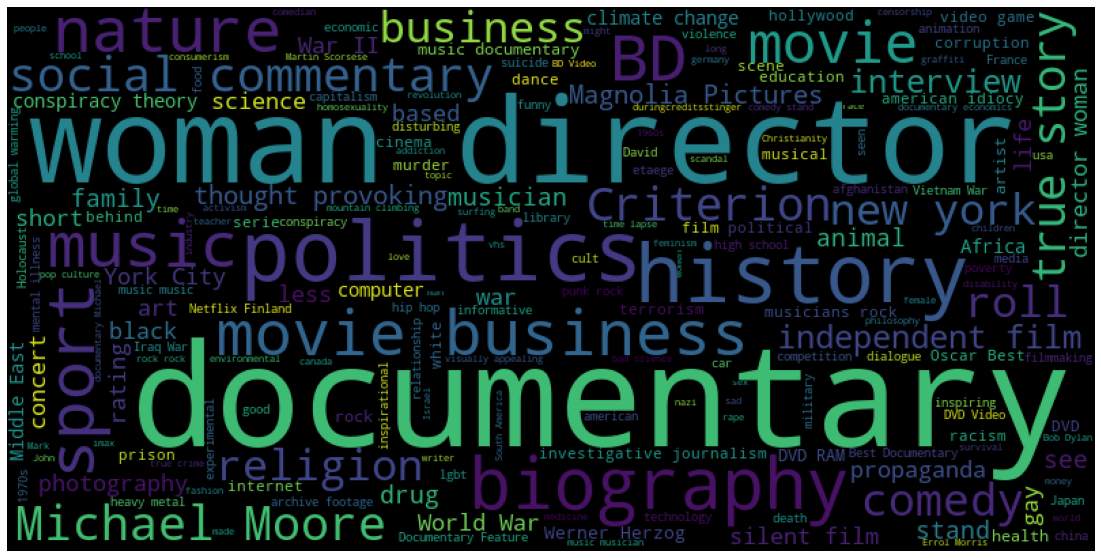

In [ ]:
text = tags_df_Documentary['tag'].str.cat(sep=' ')

wordcloud = WordCloud(background_color ='black', width=800, height=400).generate(str(text))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
del tmp_df
del tags_df_Documentary

**Let's see how many of each genre's movies were released over the years**

In [ ]:
movies_df_tmp = movies_df_copy['title'].str.extract('(?P<Year>\s+\([0-9][0-9][0-9][0-9]\))',expand=True)
movies_df_tmp = movies_df_tmp['Year'].str.extract('(?P<Year1>\((.*?)\))',expand=True)

In [ ]:
movies_df_copy['Release_Year'] = movies_df_tmp[1]

In [ ]:
movies_df_copy.head(5)

movieId                               title  Adventure  Animation  \
0        1                    Toy Story (1995)        1.0        1.0   
1        2                      Jumanji (1995)        1.0        0.0   
2        3             Grumpier Old Men (1995)        0.0        0.0   
3        4            Waiting to Exhale (1995)        0.0        0.0   
4        5  Father of the Bride Part II (1995)        0.0        0.0   

   Children  Comedy  Fantasy  Romance  Drama  Action  ...  Mystery  Sci-Fi  \
0       1.0     1.0      1.0      0.0    0.0     0.0  ...      0.0     0.0   
1       1.0     0.0      1.0      0.0    0.0     0.0  ...      0.0     0.0   
2       0.0     1.0      0.0      1.0    0.0     0.0  ...      0.0     0.0   
3       0.0     1.0      0.0      1.0    1.0     0.0  ...      0.0     0.0   
4       0.0     1.0      0.0      0.0    0.0     0.0  ...      0.0     0.0   

   IMAX  Documentary  War  Musical  Western  Film-Noir  (no genres listed)  \
0   0.0          0.0  0.0      0.0      0.0        0.0                 0.0   
1   0.0          0.0  0.0      0.0      0.0        0.0                 0.0   
2   0.0          0.0  0.0      0.0      0.0        0.0                 0.0   
3   0.0          0.0  0.0      0.0      0.0        0.0                 0.0   
4   0.0          0.0  0.0      0.0      0.0        0.0                 0.0   

   Release_Year  
0          1995  
1          1995  
2          1995  
3          1995  
4          1995  

[5 rows x 23 columns]

In [ ]:
pop_genres_year = movies_df_copy.groupby(['Release_Year'])['Adventure',	'Animation',	'Children',	'Comedy',	'Fantasy',	'Romance',	'Drama',	'Action',	'Crime',	'Thriller',	'Horror',	'Mystery',	'Sci-Fi',	'IMAX',	'Documentary',	'War',	'Musical',	'Western',	'Film-Noir', '(no genres listed)'].apply(lambda x : x.astype(int).sum())

In [ ]:
pop_genres_year = pop_genres_year.reset_index()

In [ ]:
pop_genres_year = movies_df.groupby(['Release_Year', 'genre1'])['title'].count().reset_index()
pop_genres_year  = pd.DataFrame(pop_genres_year)
pop_genres_year.tail()

Release_Year    genre1  title
2695         2019   Romance      7
2696         2019    Sci-Fi     13
2697         2019  Thriller     30
2698         2019       War      1
2699         2019   Western      5

**Taking into consideration only movies released after 1930 - Onset of Classic Hollywood**

In [ ]:
pop_genres_year_1930 = pop_genres_year[pop_genres_year['Release_Year']>='1930']

In [ ]:
pop_genres_year_1930.head()

Release_Year  Adventure  Animation  Children  Comedy  Fantasy  Romance  \
45         1930          4         12         0      44        1       34   
46         1931          5         18         1      49        0       49   
47         1932         13         28         3      67        4       51   
48         1933         11         23         5      64        6       57   
49         1934         10         17         6      73        6       65   

    Drama  Action  Crime  ...  Horror  Mystery  Sci-Fi  IMAX  Documentary  \
45     62       3     12  ...       0        6       1     0            5   
46     89       6     21  ...       8        9       2     0            4   
47    103       6     21  ...      12       16       3     0            1   
48     98      13     16  ...      12       15       4     0            2   
49     86       9     20  ...       5       16       2     0            4   

    War  Musical  Western  Film-Noir  (no genres listed)  
45    8       14        4          1                  14  
46    4        7        2          2                  17  
47    5        2        8          3                  15  
48   10       12       10          0                  24  
49    9       15       12          0                  29  

[5 rows x 21 columns]

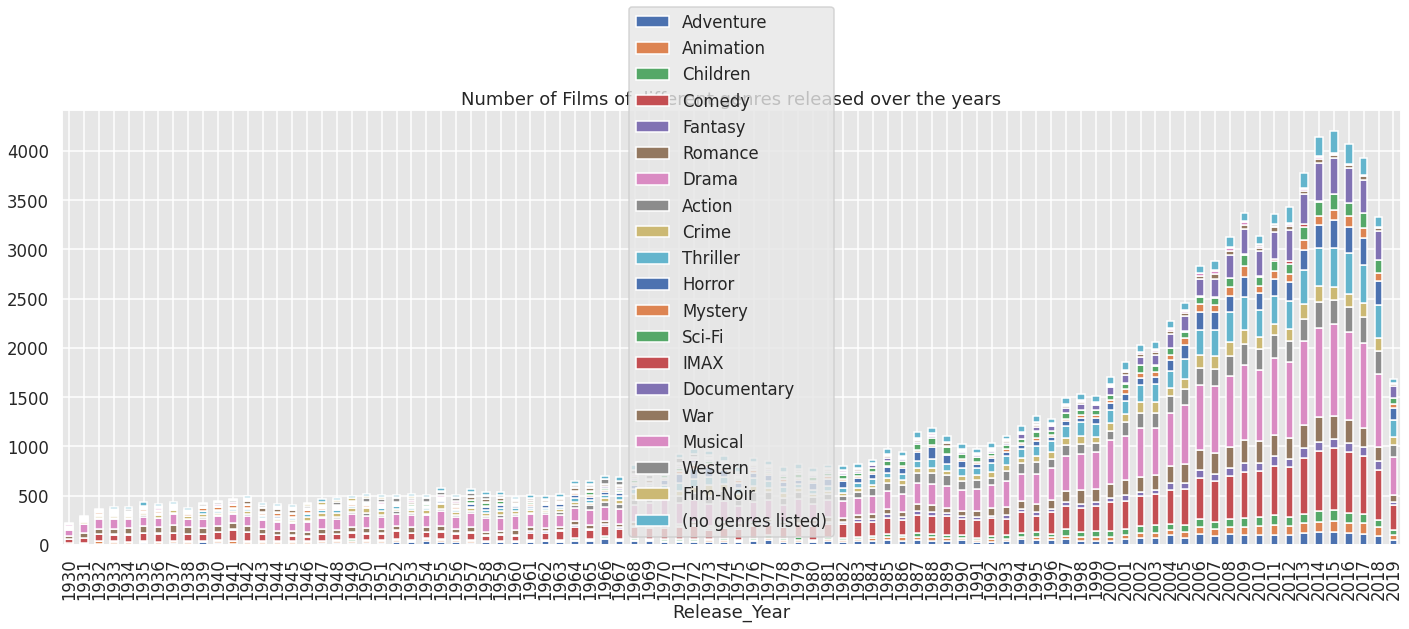

In [ ]:
pop_genres_year_1930.plot.bar(x='Release_Year', stacked=True, title='Number of Films of different genres released over the years')

**Analysis on Ratings Movie Dataframe - Merged**

In [ ]:
new_movies_df = movies_df[['movieId', 'title', 'Release_Year', 'genre1']]

In [ ]:
new_movies_df.head()

movieId                               title Release_Year     genre1
0        1                    Toy Story (1995)         1995  Adventure
1        2                      Jumanji (1995)         1995  Adventure
2        3             Grumpier Old Men (1995)         1995     Comedy
3        4            Waiting to Exhale (1995)         1995     Comedy
4        5  Father of the Bride Part II (1995)         1995     Comedy

In [ ]:
ratings_movie_df = pd.merge(ratings_df, new_movies_df, on='movieId', how='left')

In [ ]:
ratings_movie_df.shape

(25000095, 7)

In [ ]:
del ratings_movie_df['timestamp']
del ratings_movie_df['title']

In [ ]:
ratings_movie_df.head(5)

userId  movieId  rating Release_Year  genre1
0       1      296     5.0         1994  Comedy
1       1      306     3.5         1994   Drama
2       1      307     5.0         1993   Drama
3       1      665     5.0         1995  Comedy
4       1      899     3.5         1952  Comedy

**Let's see how many movies of top genres released over the years - Trend**

In [ ]:
genre_popular_year = ratings_movie_df.groupby(['genre1', 'Release_Year' ])['movieId'].count().reset_index()
genre_popular_year  = pd.DataFrame(genre_popular_year)
genre_popular_year.head(5)

genre1 Release_Year  movieId
0  (no genres listed)         1874        0
1  (no genres listed)         1878       22
2  (no genres listed)         1880        0
3  (no genres listed)         1883       11
4  (no genres listed)         1887       16

In [ ]:
genre_popular_year = genre_popular_year.rename(columns={'movieId': 'Movies_Released'})

In [ ]:
genre_popular_year.tail(5)

genre1 Release_Year  Movies_Released
2695  Western         2015             6148
2696  Western         2016               11
2697  Western         2017               73
2698  Western         2018              217
2699  Western         2019               75

In [ ]:
genre_popular_year.shape

(2700, 3)

**Taking into consideration only movies released after 1930 - Onset of Classic Hollywood**

In [ ]:
genre_popular_year_top = genre_popular_year.loc[(genre_popular_year['genre1'] == 'Drama') | (genre_popular_year['genre1'] == 'Comedy') | (genre_popular_year['genre1'] == 'Romance') | (genre_popular_year['genre1'] == 'Action') | (genre_popular_year['genre1'] == 'Thriller') | (genre_popular_year['genre1'] == 'Horror')]

In [ ]:
genre_popular_year_1930 = genre_popular_year_top[genre_popular_year_top['Release_Year']>='1930']

In [ ]:
genres_top = list((genre_popular_year_1930['genre1'].values))

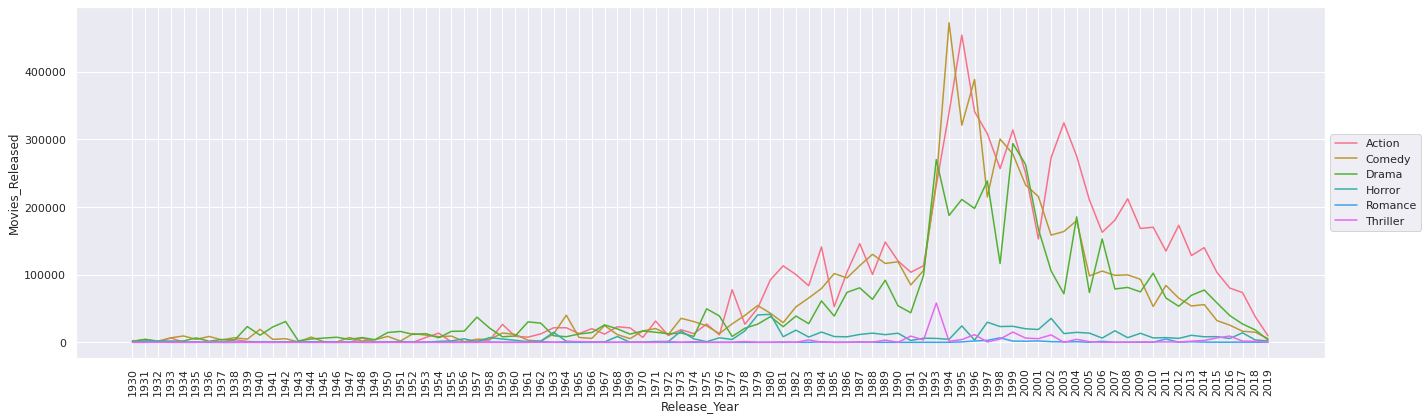

In [ ]:
sns.set(rc={'figure.figsize':(20, 6)})
sns.lineplot(x="Release_Year", y="Movies_Released", hue=genres_top, data=genre_popular_year_1930, palette = 'husl' )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90) 
plt.tight_layout()

**Getting Average Ratings and Count for each movieId**

In [ ]:
#consist of movie titles
movies_df_copy1 = pd.read_csv('/ml-25m/movies.csv')

In [ ]:
year_rel = movies_df_copy.Release_Year.values

In [ ]:
movies_df_copy1['Release_Year'] = year_rel

In [ ]:
movies_df_copy1.tail(5)

movieId                           title                  genres  \
62418   209157                       We (2018)                   Drama   
62419   209159       Window of the Soul (2001)             Documentary   
62420   209163                Bad Poems (2018)            Comedy|Drama   
62421   209169             A Girl Thing (2001)      (no genres listed)   
62422   209171  Women of Devil's Island (1962)  Action|Adventure|Drama   

      Release_Year  
62418         2018  
62419         2001  
62420         2018  
62421         2001  
62422         1962

In [ ]:
avg_ratings = ratings_df[['movieId' , 'rating']].groupby('movieId').mean().round(2)
movies_avg = movies_df_copy1.merge(avg_ratings, how='inner', on='movieId')
movies_avg.head(5)

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres Release_Year  rating  
0  Adventure|Animation|Children|Comedy|Fantasy         1995    3.89  
1                   Adventure|Children|Fantasy         1995    3.25  
2                               Comedy|Romance         1995    3.14  
3                         Comedy|Drama|Romance         1995    2.85  
4                                       Comedy         1995    3.06

In [ ]:
movies_avg.tail(5)

movieId                           title                  genres  \
59042   209157                       We (2018)                   Drama   
59043   209159       Window of the Soul (2001)             Documentary   
59044   209163                Bad Poems (2018)            Comedy|Drama   
59045   209169             A Girl Thing (2001)      (no genres listed)   
59046   209171  Women of Devil's Island (1962)  Action|Adventure|Drama   

      Release_Year  rating  
59042         2018     1.5  
59043         2001     3.0  
59044         2018     4.5  
59045         2001     3.0  
59046         1962     3.0

In [ ]:
movies_avg['Release_Year'] = pd.to_numeric(movies_avg['Release_Year'])
movies_avg['Release_Year'] = movies_avg['Release_Year'].fillna(0.0).astype(int)

In [ ]:
movies_avg.head(5)

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  Release_Year  rating  
0  Adventure|Animation|Children|Comedy|Fantasy          1995    3.89  
1                   Adventure|Children|Fantasy          1995    3.25  
2                               Comedy|Romance          1995    3.14  
3                         Comedy|Drama|Romance          1995    2.85  
4                                       Comedy          1995    3.06

In [ ]:
year_1930 = movies_avg['Release_Year'] > 1930

movies_avg_1930 = movies_avg[year_1930]

In [ ]:
movies_avg_1930 = movies_avg_1930.sort_values('Release_Year')

In [ ]:
x = movies_avg_1930['Release_Year'].unique()

y1 = movies_avg_1930[['Release_Year','rating']].groupby('Release_Year').mean()  # average ratings

y2 = movies_avg_1930[['Release_Year','title']].groupby('Release_Year').count()  # count of movies

**Plots showing mean ratings and number of ratings from 1930 onwards**

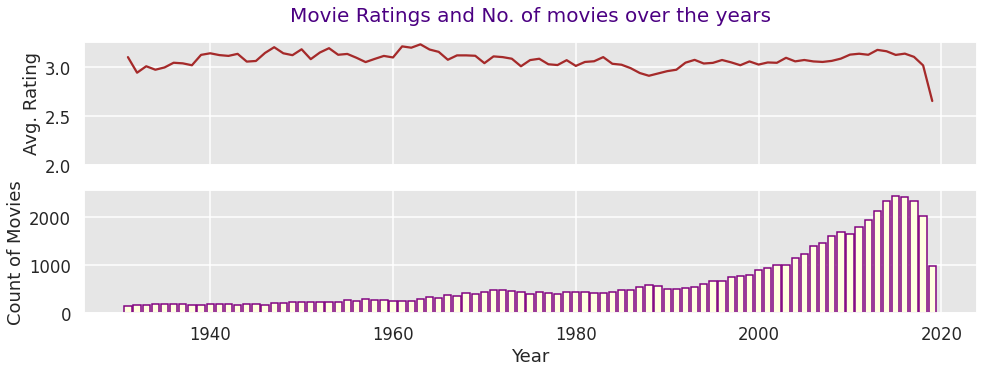

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(16,5), sharex=True)

ax1.set_title('Movie Ratings and No. of movies over the years', loc = 'center' , pad = 20 , fontdict={'fontsize':20 , 'color' : 'indigo', 
#                                                                                  'fontstyle' : 'italic',
                                                                                'fontfamily' : 'Tahoma'})
ax1.plot(x,y1,color='brown')
ax1.set_ylabel('Avg. Rating')
ax1.set_ylim(2,)

ax2.bar( x, y2.title.values,  color = 'lightyellow', label=True, edgecolor = 'purple' )
ax2.set_ylabel('Count of Movies')
ax2.set_xlabel('Year')

plt.show()

**Zooming in on years from 1990**

In [ ]:
year_1990 = movies_avg['Release_Year'] > 1990

movies_avg_1990 = movies_avg[year_1990]

In [ ]:
movies_avg_1990 = movies_avg_1990.sort_values('Release_Year')

In [ ]:
x = movies_avg_1990['Release_Year'].unique()

y1 = movies_avg_1990[['Release_Year','rating']].groupby('Release_Year').mean()  # average ratings

y2 = movies_avg_1990[['Release_Year','title']].groupby('Release_Year').count()  # count of movies

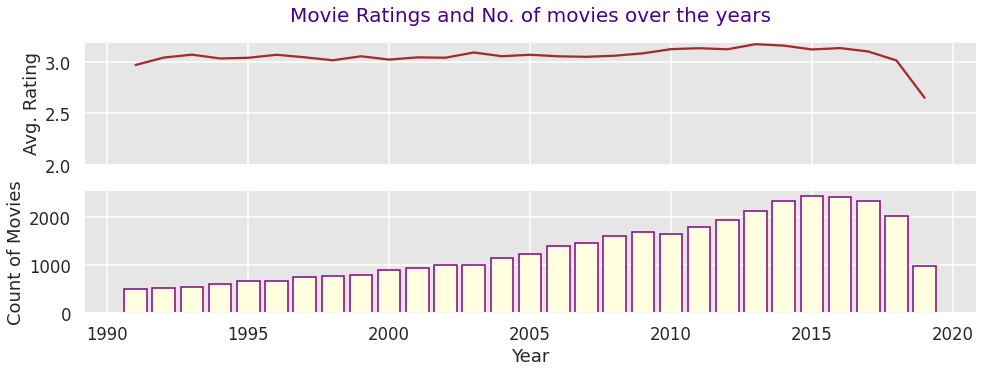

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(16,5), sharex=True)

ax1.set_title('Movie Ratings and No. of movies over the years', loc = 'center' , pad = 20 , fontdict={'fontsize':20 , 'color' : 'indigo', 
#                                                                                  'fontstyle' : 'italic',
                                                                                'fontfamily' : 'Tahoma'})
ax1.plot(x,y1,color='brown')
ax1.set_ylabel('Avg. Rating')
ax1.set_ylim(2,)

ax2.bar( x, y2.title.values,  color = 'lightyellow', label=True, edgecolor = 'purple' )
ax2.set_ylabel('Count of Movies')
ax2.set_xlabel('Year')

plt.show()

**Release Count and Rating Count Over the years - from 1990**

In [ ]:
ratings_movie_df.head(5)

userId  movieId  rating Release_Year  genre1
0       1      296     5.0         1994  Comedy
1       1      306     3.5         1994   Drama
2       1      307     5.0         1993   Drama
3       1      665     5.0         1995  Comedy
4       1      899     3.5         1952  Comedy

In [ ]:
ratings_movie_df['Release_Year'] = ratings_movie_df['Release_Year'].fillna(0.0).astype(int)

In [ ]:
ratings_movie_df.head()

userId  movieId  rating  Release_Year  genre1
0       1      296     5.0          1994  Comedy
1       1      306     3.5          1994   Drama
2       1      307     5.0          1993   Drama
3       1      665     5.0          1995  Comedy
4       1      899     3.5          1952  Comedy

In [ ]:
year_1930 = ratings_movie_df['Release_Year'] > 1930

ratings_movie_df_1930 = ratings_movie_df[year_1930]

In [ ]:
ratings_movie_df_1930 = ratings_movie_df_1930.sort_values('Release_Year')

(0.0, 1571906.9)

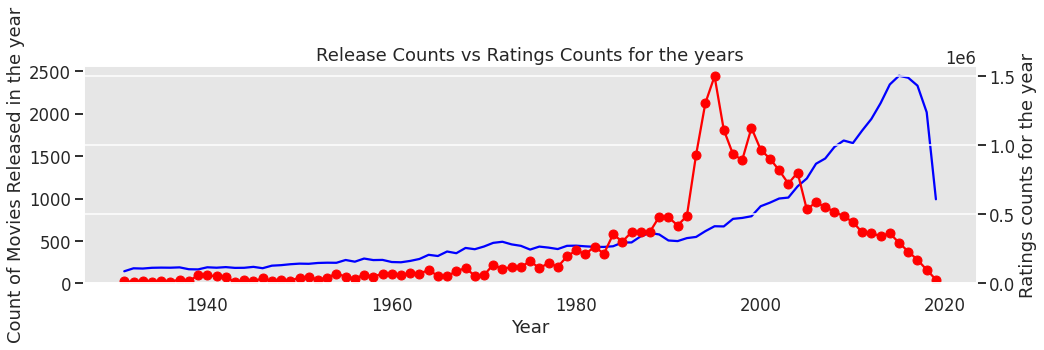

In [ ]:
# Count of ratings collected per year
ratings_per_year = ratings_movie_df_1930[['Release_Year' , 'movieId']].groupby('Release_Year').count()

# plot commong graph keeping year scale common for rating and movie counts

fig, ax1 = plt.subplots(figsize=(16,4))

ax1.set_title('Release Counts vs Ratings Counts for the years')
ax1.plot(x,y2,color='Blue')
ax1.set_ylabel('Count of Movies Released in the year')
ax1.set_xlabel('Year')
ax1.grid(None)
ax1.set_ylim(0,)
# ax1.legend(True)

ax2 = ax1.twinx()
ax2.plot(ratings_per_year,'-ro' , color='red' )
ax2.set_ylabel('Ratings counts for the year')
ax2.set_ylim(0,)

**Zooming in - from 90's**

In [ ]:
year_1990 = ratings_movie_df['Release_Year'] > 1990

ratings_movie_df_1990 = ratings_movie_df[year_1990]

In [ ]:
ratings_movie_df_1990 = ratings_movie_df_1990.sort_values('Release_Year')

(0.0, 1570977.0)

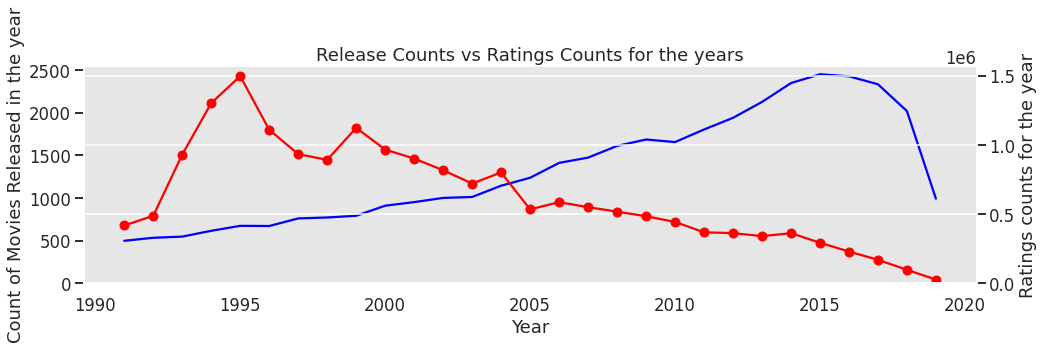

In [ ]:
# Count of ratings collected per year
ratings_per_year = ratings_movie_df_1990[['Release_Year' , 'movieId']].groupby('Release_Year').count()

# plot commong graph keeping year scale common for rating and movie counts

fig, ax1 = plt.subplots(figsize=(16,4))

ax1.set_title('Release Counts vs Ratings Counts for the years')
ax1.plot(x,y2,color='Blue')
ax1.set_ylabel('Count of Movies Released in the year')
ax1.set_xlabel('Year')
ax1.grid(None)
ax1.set_ylim(0,)
# ax1.legend(True)

ax2 = ax1.twinx()
ax2.plot(ratings_per_year,'-ro' , color='red' )
ax2.set_ylabel('Ratings counts for the year')
ax2.set_ylim(0,)

**Top movies (across genre) - taking into account the rating count and average ratings both**

In [ ]:
# count of ratings
count_of_ratings = ratings_df[['movieId' , 'userId']].groupby('movieId').count()
count_of_ratings.rename(columns={'userId' : 'Total_Ratings'}, inplace=True)

# mean Ratings
avg_ratings = ratings_df[['movieId' , 'rating']].groupby('movieId').mean().round(2)
movies_avg = movies_df_copy.merge(avg_ratings, how='inner', on='movieId')

# Joining count of ratings with movies names
# top 25 most rated movies of all time
movie_rating_counts = movies_avg[['movieId','title', 'genres', 'rating']].merge(count_of_ratings, on='movieId')

movie_rating_counts.rename(columns={'rating' : 'Average_Rating'}, inplace=True)
movie_rating_counts.sort_values(['Total_Ratings', 'Average_Rating'], ascending=[False, False])[:10] [['title', 'genres' , 'Total_Ratings', 'Average_Rating']]

title  \
351                         Forrest Gump (1994)   
314            Shawshank Redemption, The (1994)   
292                         Pulp Fiction (1994)   
585            Silence of the Lambs, The (1991)   
2480                         Matrix, The (1999)   
257   Star Wars: Episode IV - A New Hope (1977)   
475                        Jurassic Park (1993)   
522                     Schindler's List (1993)   
108                           Braveheart (1995)   
2867                          Fight Club (1999)   

                                genres  Total_Ratings  Average_Rating  
351           Comedy|Drama|Romance|War          81491            4.05  
314                        Crime|Drama          81482            4.41  
292        Comedy|Crime|Drama|Thriller          79672            4.19  
585              Crime|Horror|Thriller          74127            4.15  
2480            Action|Sci-Fi|Thriller          72674            4.15  
257            Action|Adventure|Sci-Fi          68717            4.12  
475   Action|Adventure|Sci-Fi|Thriller          64144            3.68  
522                          Drama|War          60411            4.25  
108                   Action|Drama|War          59184            4.00  
2867       Action|Crime|Drama|Thriller          58773            4.23

### Plot on just the main/first genre

**Separating Genres**

In [ ]:
genres_tmp = movies_df['genres'].str.split(pat='|', expand=True).fillna(0)
genres_tmp.columns = ['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8', 'genre9', 'genre10']
cols = genres_tmp.columns
genres_tmp[cols] = genres_tmp[cols].astype('category')
genres_tmp2 = genres_tmp.copy()
cat_columns = genres_tmp2.select_dtypes(['category']).columns

# count genres for each movie
genres_tmp2[cat_columns] = genres_tmp2[cat_columns].apply(lambda x: x.cat.codes)
genres_tmp2['genre_count'] = genres_tmp2[cols].gt(0).sum(axis=1)

movies_df['genre_count'] = genres_tmp2['genre_count']
movies_df[cols] = genres_tmp[cols]

movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres Release_Year  genre_count  \
0  Adventure|Animation|Children|Comedy|Fantasy         1995            5   
1                   Adventure|Children|Fantasy         1995            3   
2                               Comedy|Romance         1995            2   
3                         Comedy|Drama|Romance         1995            3   
4                                       Comedy         1995            1   

      genre1     genre2    genre3  genre4   genre5 genre6 genre7 genre8  \
0  Adventure  Animation  Children  Comedy  Fantasy      0      0      0   
1  Adventure   Children   Fantasy       0        0      0      0      0   
2     Comedy    Romance         0       0        0      0      0      0   
3     Comedy      Drama   Romance       0        0      0      0      0   
4     Comedy          0         0       0        0      0      0      0   

  genre9 genre10  
0      0       0  
1      0       0  
2      0       0  
3      0       0  
4      0       0

**Getting number of None values in later genres(5 and after)**

In [ ]:
# Get the count of Zeros in column 'genre5' 
count5 = (movies_df['genre5'] == 0).sum()
print("Genre 5: ", count5)

# Get the count of Zeros in column 'genre6' 
count6 = (movies_df['genre6'] == 0).sum()
print("Genre 6: ", count6)

# Get the count of Zeros in column 'genre7' 
count7 = (movies_df['genre7'] == 0).sum()
print("Genre 7: ", count7)

# Get the count of Zeros in column 'genre8' 
count8 = (movies_df['genre8'] == 0).sum()
print("Genre 8: ", count8)

# Get the count of Zeros in column 'genre9' 
count9 = (movies_df['genre9'] == 0).sum()
print("Genre 9: ", count9)

# Get the count of Zeros in column 'genre10' 
count10 = (movies_df['genre10'] == 0).sum()
print("Genre 10: ", count10)

Genre 5:  61593
Genre 6:  62273
Genre 7:  62396
Genre 8:  62420
Genre 9:  62422
Genre 10:  62422


**Genre 1 has no None values**

In [ ]:
# Get the count of Zeros in column 'genre1' 
count1 = (movies_df['genre1'] == 0).sum()
print("Genre 1: ", count1)

Genre 1:  0


**Hence, creating a new ratings dataframe with just Genre 1 merged to it - on movieId**

In [ ]:
cols = ['movieId', 'genre1']
movie_genre = movies_df[cols]
rating_genre_merge = ratings_df.merge(movie_genre, on='movieId', how='inner')

In [ ]:
rating_genre_merge.shape

(25000095, 4)

In [ ]:
rating_genre_merge.head(5)

userId  movieId  rating     genre1
0   13334        1     5.0  Adventure
1   69000        1     4.0  Adventure
2   26803        1     3.5  Adventure
3  124893        1     3.5  Adventure
4  141835        1     3.5  Adventure

**BoxPlot showing mean rating and min-max ratings for each genre (genre 1)**

(-2.0, 7.0)

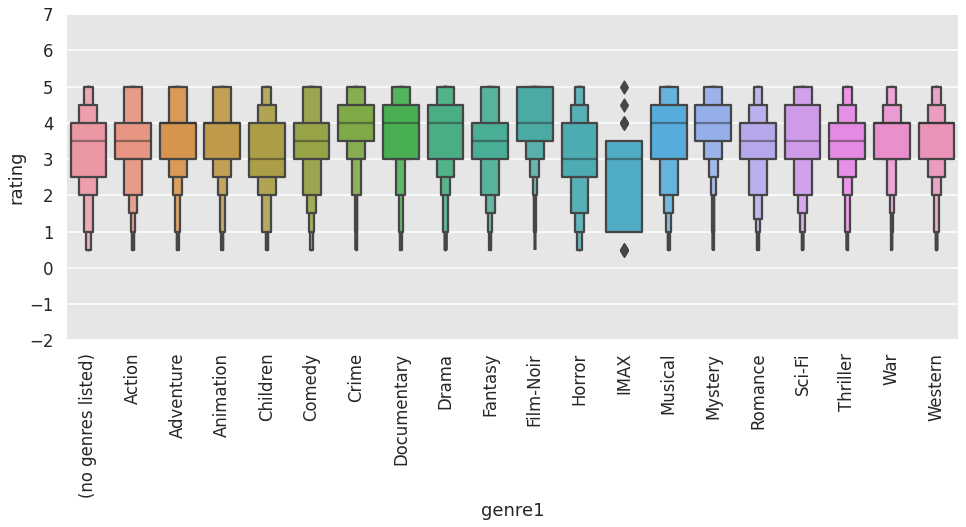

In [ ]:
sns.set(rc={'figure.figsize':(16, 6)})
sns.set_context("talk")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.boxenplot(x=rating_genre_merge.genre1, y=rating_genre_merge.rating, data=rating_genre_merge)
plt.xticks(rotation=90)
plt.ylim(-2, 7)

## Making of UsersByGenre Table for SVD and Clustering

In [ ]:
from tqdm import tqdm

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import pandas as pd
import dask.dataframe as dd
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [ ]:
movies_df = movies_df.set_index('movieId')

In [ ]:
ratings_df = ratings_df.set_index('movieId')

In [ ]:
ratings_df.head(5)

userId  rating
movieId                
296           1     5.0
306           1     3.5
307           1     5.0
665           1     5.0
899           1     3.5

In [ ]:
movies_df.head(5)

title  \
movieId                                       
1                          Toy Story (1995)   
2                            Jumanji (1995)   
3                   Grumpier Old Men (1995)   
4                  Waiting to Exhale (1995)   
5        Father of the Bride Part II (1995)   

                                              genres  
movieId                                               
1        Adventure|Animation|Children|Comedy|Fantasy  
2                         Adventure|Children|Fantasy  
3                                     Comedy|Romance  
4                               Comedy|Drama|Romance  
5                                             Comedy

In [ ]:
ratings_df_group = ratings_df.groupby('userId')

In [ ]:
main_df = pd.DataFrame(columns=['userId', 'rating', 'Adventure',	'Animation',	'Children',	'Comedy',	'Fantasy',	'Romance',	'Drama',	'Action',	'Crime',	'Thriller',	'Horror',	'Mystery',	'Sci-Fi',	'IMAX',	'Documentary',	'War',	'Musical',	'Western',	'Film-Noir', '(no genres listed)'])

In [ ]:
# get all the group keys (group names)
uId_keys = ratings_df_group.groups.keys()

In [ ]:
uId_keys_l = list(uId_keys)

In [ ]:
def f(category_list):
    '''This is a helper function that splits and maps the categories.'''
    n_categories = len(category_list)
    return pd.Series(dict(zip(category_list, [1]*n_categories)))   

for uId in tqdm(uId_keys_l):
    g1_tmp = ratings_df_group.get_group(uId)
    rating_mv_g1 = g1_tmp.join(movies_df, on=None, how='inner')
    del rating_mv_g1['title']

    # table1 : movie and genre
    t1 = rating_mv_g1.genres.dropna().str.split('|').apply(f)
    rating_mv_g1 = pd.concat([rating_mv_g1, t1], axis = 1)
    rating_mv_g1 = rating_mv_g1.drop('genres',1)
    rating_mv_g1 = rating_mv_g1.sort_values(by='movieId')
    rating_mv_g1 = rating_mv_g1.fillna(0)

    ll = list(range(2,(rating_mv_g1.shape[1])))
    rating_mv_g1.iloc[0:, ll] = rating_mv_g1.iloc[:, ll].sum()
    rating_mv_g1.iloc[0:, 1] = rating_mv_g1.iloc[:, 1].mean()
    rating_mv_g1 = rating_mv_g1.reset_index()
    del rating_mv_g1['movieId']
    rating_mv_g1 = (rating_mv_g1.iloc[0])

    # align columns and fill missing values with 0
    rating_mv_g1 = rating_mv_g1.reindex(main_df.columns, fill_value=0)
    # append the Series to the DataFrame
    main_df = main_df.append(rating_mv_g1, ignore_index=True)
    del rating_mv_g1

100%|██████████| 162541/162541 [2:38:40<00:00, 17.07it/s]


In [ ]:
main_df.head()

userId    rating  Adventure  Animation  Children  Comedy  Fantasy  Romance  \
0     1.0  3.814286       11.0        2.0       3.0    23.0      5.0     18.0   
1     2.0  3.630435       75.0       17.0      25.0    63.0     29.0     34.0   
2     3.0  3.697409      198.0       50.0      48.0   176.0     78.0     60.0   
3     4.0  3.378099      114.0       31.0      28.0    81.0     39.0     10.0   
4     5.0  3.752475       21.0        4.0       9.0    49.0      8.0     20.0   

   Drama  Action  ...  Horror  Mystery  Sci-Fi  IMAX  Documentary   War  \
0   53.0     4.0  ...     1.0      4.0     5.0   0.0          1.0   5.0   
1   91.0    66.0  ...     3.0      8.0    28.0   6.0          0.0  15.0   
2  232.0   334.0  ...    45.0     60.0   224.0  81.0          3.0  26.0   
3   49.0   145.0  ...    10.0     18.0    85.0  41.0          5.0   9.0   
4   45.0    18.0  ...     3.0      7.0    11.0   3.0          0.0   2.0   

   Musical  Western  Film-Noir  (no genres listed)  
0      5.0      1.0        1.0                 0.0  
1     11.0      5.0        0.0                 0.0  
2      6.0      8.0        5.0                 1.0  
3      7.0      9.0        0.0                 0.0  
4      7.0      5.0        0.0                 0.0  

[5 rows x 22 columns]

In [ ]:
main_df.to_pickle("user_clustering.pkl")

In [ ]:
# save the DataFrame as a CSV file
main_df.to_csv('user_clustering.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
colab_link = '/content/user_clustering.csv'
gdrive_link = '/content/drive/MyDrive/movielens_app'
shutil.copy(colab_link, gdrive_link)

'/content/drive/MyDrive/movielens_app/user_clustering.csv'

In [ ]:
main_df_copy = main_df.copy()

In [ ]:
main_df_copy = main_df_copy.sort_values('userId')

In [ ]:
main_df_copy.iloc[72314]

userId                72315.000000
rating                    3.080601
Adventure              2016.000000
Animation              1331.000000
Children                990.000000
Comedy                 7923.000000
Fantasy                1453.000000
Romance                4258.000000
Drama                 16485.000000
Action                 3190.000000
Crime                  2946.000000
Thriller               4388.000000
Horror                 2690.000000
Mystery                1581.000000
Sci-Fi                 1762.000000
IMAX                    161.000000
Documentary            3103.000000
War                    1246.000000
Musical                 686.000000
Western                 598.000000
Film-Noir               336.000000
(no genres listed)     1931.000000
Name: 72314, dtype: float64

In [ ]:
# Outlier
main_df_copy.drop(main_df_copy.iloc[72314].name,  inplace=True)
# have to remove userId
del main_df_copy['userId']

In [ ]:
from sklearn.preprocessing import StandardScaler
# create an instance of the StandardScaler class
scaler = StandardScaler()

# fit the scaler to the DataFrame
scaler.fit(main_df_copy)

# transform the DataFrame
main_df_norm = scaler.transform(main_df_copy)

# convert the normalized values back to a DataFrame
main_df_norm = pd.DataFrame(main_df_norm, columns=main_df_copy.columns)

In [ ]:
main_df_norm.tail()

rating  Adventure  Animation  Children    Comedy   Fantasy  \
162535  0.754966  -0.384218  -0.159135 -0.002703  0.043161 -0.266810   
162536 -0.552248  -0.171522  -0.001377 -0.131339  0.220750 -0.086823   
162537  1.741702  -0.403554  -0.369479 -0.474366 -0.437375 -0.518791   
162538  0.314930  -0.132850   0.577069  0.340324 -0.249339 -0.086823   
162539 -0.657408   0.369886   0.208967  0.168810  0.272982  0.417141   

         Romance     Drama    Action     Crime  ...    Horror   Mystery  \
162535  0.137407 -0.280309 -0.386012 -0.431926  ... -0.212379 -0.443563   
162536  0.807437  0.089563 -0.288802 -0.286019  ... -0.020030 -0.254058   
162537 -0.338098 -0.339153 -0.386012 -0.529197  ... -0.340613 -0.443563   
162538 -0.057117 -0.271903 -0.316576 -0.383290  ... -0.052088 -0.206682   
162539  0.180635  0.072751  0.141701 -0.018524  ... -0.084146 -0.159306   

          Sci-Fi      IMAX  Documentary       War   Musical   Western  \
162535 -0.513298 -0.521576    -0.107527 -0.450864  0.531687 -0.307459   
162536 -0.299449  0.116374    -0.218986  0.172149  0.006289 -0.151578   
162537 -0.370732 -0.521576    -0.218986  1.028791 -0.431542 -0.463340   
162538 -0.323210  0.196117    -0.218986 -0.217234 -0.168843 -0.463340   
162539  0.199532 -0.043114    -0.218986 -0.295111 -0.081277  0.316065   

        Film-Noir  (no genres listed)  
162535  -0.353249           -0.087785  
162536  -0.353249           -0.087785  
162537   0.344433           -0.087785  
162538  -0.353249           -0.087785  
162539  -0.120689           -0.087785  

[5 rows x 21 columns]

## K-Means++ Clustering - Similar Users

In [ ]:
# Create a sparse matrix
sparse_matrix = csr_matrix(main_df_norm)

# Perform SVD on the sparse matrix
svd = TruncatedSVD(n_components=2)
X = svd.fit_transform(sparse_matrix)

100%|██████████| 10/10 [00:40<00:00,  4.08s/it]


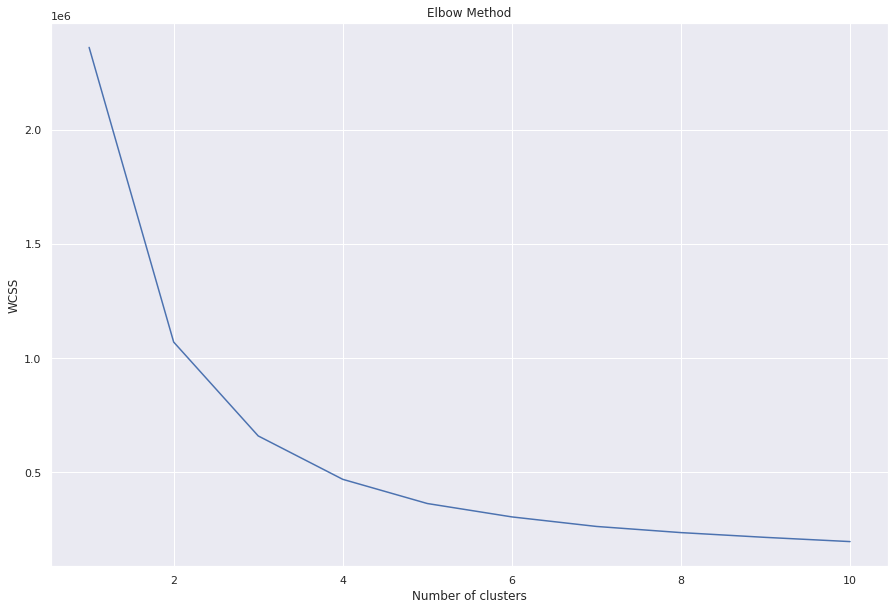

In [ ]:
# Create an empty list to store WCSS values
wcss = []

# Fit KMeans and calculate WCSS for each K
for i in tqdm(range(1, 11)):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against K
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_


In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

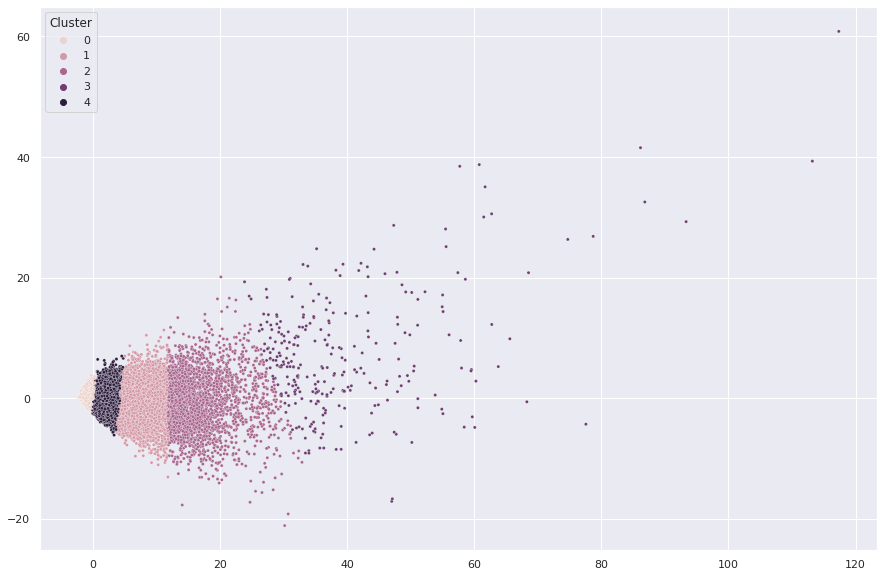

In [ ]:
# Create a scatter plot with the x and y values of your data, using the 'hue' parameter to color the points based on their cluster labels
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, data=X, s=10)

# Add a legend to the plot
plt.legend(title='Cluster')

# Show the plot
plt.show()

## K-Nearest Neighbours - Similar Users

In [ ]:
# Create a NearestNeighbors object
nn = NearestNeighbors(n_neighbors=11)

# Fit the NearestNeighbors object to the data
nn.fit(X)

In [ ]:
print("Input User Id:")
userii = input()
userii = int(userii)
if userii < 72341: 
      userii = userii - 1
else:
      userii = userii - 2
# Find the k nearest neighbors for a specific data point
index = userii
distances, indices = nn.kneighbors([X[index]], return_distance=True)

# The indices of the k nearest neighbors can be found in the indices array
# print("Indices:",indices,'\nDistances:',distances[0])

Input User Id:
79687
Indices: [[ 79685 159486  34812  29003   9713  31986  85009  37096  93928  79374
    2472]] 
Distances: [0.         0.07772382 0.11825433 0.1332844  0.1463854  0.20663945
 0.23696568 0.24748216 0.25071704 0.25079307 0.26529041]


In [ ]:
main_df_copy2 = main_df.copy()
main_df_copy2 = main_df_copy2.sort_values('userId')

In [ ]:
# Outlier
main_df_copy2.drop(main_df_copy2.iloc[72314].name,  inplace=True)

In [ ]:
flag = 0
for index_u in range(11):
    if indices[0][index_u] >= 72341: 
      indices[0][index_u] = indices[0][index_u] + 1

similar_ui = main_df_copy2.loc[indices[0]]
similar_ui.insert(1, 'Distance', list(distances[0]))
# similar_ui['Distance'] = list(distances[0])
similar_ui = similar_ui.sort_values(by='Distance')
similar_ui.rename(columns = {'rating':'Mean Rating'}, inplace = True)
similar_ui

userId  Distance  Mean Rating  Adventure  Animation  Children  \
79686    79687.0  0.000000     3.660160      157.0       29.0      35.0   
159487  159488.0  0.077724     3.025768      193.0       14.0      22.0   
34812    34813.0  0.118254     3.380892      120.0       37.0      23.0   
29003    29004.0  0.133284     3.536869      154.0       67.0      75.0   
9713      9714.0  0.146385     2.996496      149.0       25.0      48.0   
31986    31987.0  0.206639     3.827357      147.0       44.0      83.0   
85010    85011.0  0.236966     3.978386      172.0       29.0      57.0   
37096    37097.0  0.247482     3.408000      150.0       45.0      80.0   
93929    93930.0  0.250717     3.385266      198.0       46.0      57.0   
79375    79376.0  0.250793     3.211951      149.0       29.0      54.0   
2472      2473.0  0.265290     3.988901      173.0       42.0      54.0   

        Comedy  Fantasy  Romance  Drama  ...  Horror  Mystery  Sci-Fi  IMAX  \
79686    339.0     61.0    181.0  603.0  ...    35.0     81.0   126.0  30.0   
159487   305.0     82.0    117.0  411.0  ...   102.0     81.0   152.0  11.0   
34812    163.0     90.0     69.0  417.0  ...    95.0    119.0   160.0  42.0   
29003    229.0     86.0    105.0  347.0  ...    19.0     50.0   132.0  28.0   
9713     379.0     75.0    247.0  526.0  ...    60.0     83.0   107.0  10.0   
31986    390.0     77.0    187.0  508.0  ...    30.0     70.0    70.0  21.0   
85010    394.0    102.0    228.0  618.0  ...    18.0     64.0    64.0  30.0   
37096    373.0     86.0    223.0  558.0  ...    46.0     73.0    91.0   4.0   
93929    234.0     98.0    130.0  426.0  ...    62.0     89.0   132.0  17.0   
79375    534.0     65.0    186.0  526.0  ...    32.0     68.0   101.0  11.0   
2472     285.0     83.0    175.0  478.0  ...    49.0     73.0   136.0   4.0   

        Documentary   War  Musical  Western  Film-Noir  (no genres listed)  
79686          15.0  51.0     11.0     22.0       13.0                 0.0  
159487         19.0  47.0      9.0     18.0       15.0                 0.0  
34812          56.0  60.0      9.0     16.0        9.0                 1.0  
29003          88.0  15.0     47.0     14.0       21.0                 3.0  
9713           26.0  37.0     69.0      9.0       15.0                 0.0  
31986          62.0  46.0     45.0     13.0        8.0                 0.0  
85010          46.0  56.0     37.0     33.0        2.0                 0.0  
37096          11.0  61.0     46.0     18.0       16.0                 0.0  
93929          25.0  58.0     18.0     20.0       24.0                 0.0  
79375          21.0  55.0     39.0     24.0        7.0                 0.0  
2472           18.0  51.0     43.0     17.0       21.0                 0.0  

[11 rows x 23 columns]

## References

**I have taken some help regarding the actual code for different plots from below sources. Details like which plot to use and hyperparameters like figsize and others were just taken from them. Rest everything, creation of different dataframes and getting respective values in them through merging and different conditions so that we can use these dataframes and these values to create these plot were done on my own:**



1.   **Exploratory Analysis - MovieLens DataSet:** *https://www.kaggle.com/code/makarandm/exploratory-analysis-movielens-dataset*
2.   *https://github.com/SaadMuhammad/movie_db/blob/main/Analysis_Report_Movielens_dataset.ipynb*